### General advice (delete this cell before submitting for review)

> * Remove the "**Sign up to the DEA Sandbox** to run this notebook interactively from a browser" header text if the notebook is not DEA Sandbox-compatible or if it is not synced to the DEA Sandbox (e.g. `Scientific_workflows` notebooks)
> * Update the **Compatibility** line depending on whether the notebook is compatible with the `NCI` and `DEA Sandbox` environments (e.g. "Notebook currently compatible with the `DEA Sandbox` environment only" or "Notebook currently compatible with the `NCI` environment only")
> * When adding **Products used**, embed the hyperlink to that specific product on the DEA Explorer using the `[product_name](product url)` syntax.
> * When writing in Markdown cells, start each sentence on a **new line**.
This makes it easy to see changes through git commits.
> * Use Australian English in markdown cells and code comments.
> * Check the [known issues](https://github.com/GeoscienceAustralia/dea-docs/wiki/Known-issues) for formatting regarding the conversion of notebooks to DEA docs using Sphinx.
Things to be aware of:
    * Sphinx is highly sensitive to bulleted lists:
        * Ensure that there is an empty line between any preceding text and the list
        * Only use the `*` bullet (`-` is not recognised)
        * Sublists must be indented by 4 spaces
    * Two kinds of formatting cannot be used simultaneously:
        * Hyperlinked code: \[\`code_format\`](hyperlink) fails
        * Bolded code: \*\*\`code_format\`\*\* fails
    * Headers must appear in heirachical order (`#`, `##`, `###`, `####`) and there can only be one title (`#`).
> * Use the [PEP8 standard](https://www.python.org/dev/peps/pep-0008/) for code. To make sure all code in the notebook is consistent, you can use the `jupyterlab_code_formatter` tool: select each code cell, then click `Edit` and then one of the `Apply X Formatter` options (`YAPF` or `Black` are recommended). This will reformat the code in the cell to a consistent style.
> * For additional guidance, refer to the style conventions and layouts in approved `develop` branch notebooks. 
Examples include
    * [Frequently_used_code/Using_load_ard.ipynb](./Frequently_used_code/Using_load_ard.ipynb)
    * [Real_world_examples/Coastal_erosion.ipynb](./Real_world_examples/Coastal_erosion.ipynb)
    * [Scripts/dea_datahandling.py](./Scripts/dea_datahandling.py)
> * In the final notebook cell, include a set of relevant tags which are used to build the DEA User Guide's [Tag Index](https://docs.dea.ga.gov.au/genindex.html). 
Use all lower-case (unless the tag is an acronym), separate words with spaces (unless it is the name of an imported module), and [re-use existing tags](https://github.com/GeoscienceAustralia/dea-notebooks/wiki/List-of-tags).
Ensure the tags cell below is in `Raw` format, rather than `Markdown` or `Code`.


# Introduction to DEA Land Cover <img align="right" src="../Supplementary_data/dea_logo.jpg">

* [**Sign up to the DEA Sandbox**](https://docs.dea.ga.gov.au/setup/sandbox.html) to run this notebook interactively from a browser
* **Compatibility:** Notebook currently compatible with both the `NCI` and `DEA Sandbox` environments
* **Products used:** 
[ga_ls_landcover_class_cyear_2](https://explorer.sandbox.dea.ga.gov.au/ga_ls_landcover_class_cyear_2)


## Background
An *optional* overview of the scientific, economic or environmental management issue or challenge being addressed by Digital Earth Australia. 
For `Beginners_Guide` or `Frequently_Used_Code` notebooks, this may include information about why the particular technique or approach is useful or required. 
If you need to cite a scientific paper or link to a website, use a persistent DOI link if possible and link in-text (e.g. [Dhu et al. 2017](https://doi.org/10.1080/20964471.2017.1402490)).

## Applications


## Description

## Getting started

### Load packages
Import Python packages that are used for the analysis.


In [1]:
%matplotlib inline

import datacube
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

import sys
sys.path.insert(1, '../Tools/')
from dea_tools.plotting import rgb
from matplotlib import colors as mcolours


### Connect to the datacube

Connect to the datacube so we can access DEA data.

In [2]:
dc = datacube.Datacube(app='DEA_Land_Cover')

In [3]:
dc.list_measurements().loc[['ga_ls_landcover_class_cyear_2']]

name  \
product                       measurement                                        
ga_ls_landcover_class_cyear_2 level3                                    level3   
                              lifeform_veg_cat_l4a        lifeform_veg_cat_l4a   
                              canopyco_veg_cat_l4d        canopyco_veg_cat_l4d   
                              watersea_veg_cat_l4a_au  watersea_veg_cat_l4a_au   
                              waterstt_wat_cat_l4a        waterstt_wat_cat_l4a   
                              inttidal_wat_cat_l4a        inttidal_wat_cat_l4a   
                              waterper_wat_cat_l4d_au  waterper_wat_cat_l4d_au   
                              baregrad_phy_cat_l4d_au  baregrad_phy_cat_l4d_au   
                              level4                                    level4   

                                                       dtype units nodata  \
product                       measurement                                   
ga_ls_landcover_class_cyear_2 level3                   uint8     1      0   
                              lifeform_veg_cat_l4a      int8     1      0   
                              canopyco_veg_cat_l4d      int8     1      0   
                              watersea_veg_cat_l4a_au   int8     1      0   
                              waterstt_wat_cat_l4a      int8     1      0   
                              inttidal_wat_cat_l4a      int8     1      0   
                              waterper_wat_cat_l4d_au   int8     1      0   
                              baregrad_phy_cat_l4d_au   int8     1      0   
                              level4                    int8     1      0   

                                                                     aliases  \
product                       measurement                                      
ga_ls_landcover_class_cyear_2 level3                                     NaN   
                              lifeform_veg_cat_l4a                [lifeform]   
                              canopyco_veg_cat_l4d        [vegetation_cover]   
                              watersea_veg_cat_l4a_au    [water_seasonality]   
                              waterstt_wat_cat_l4a             [water_state]   
                              inttidal_wat_cat_l4a              [intertidal]   
                              waterper_wat_cat_l4d_au    [water_persistence]   
                              baregrad_phy_cat_l4d_au       [bare_gradation]   
                              level4                   [full_classification]   

                                                      flags_definition  \
product                       measurement                                
ga_ls_landcover_class_cyear_2 level3                               NaN   
                              lifeform_veg_cat_l4a                 NaN   
                              canopyco_veg_cat_l4d                 NaN   
                              watersea_veg_cat_l4a_au              NaN   
                              waterstt_wat_cat_l4a                 NaN   
                              inttidal_wat_cat_l4a                 NaN   
                              waterper_wat_cat_l4d_au              NaN   
                              baregrad_phy_cat_l4d_au              NaN   
                              level4                               NaN   

                                                      spectral_definition  
product                       measurement                                  
ga_ls_landcover_class_cyear_2 level3                                  NaN  
                              lifeform_veg_cat_l4a                    NaN  
                              canopyco_veg_cat_l4d                    NaN  
                              watersea_veg_cat_l4a_au                 NaN  
                              waterstt_wat_cat_l4a                    NaN  
                              inttidal_wat_cat_l4a                    NaN  
                   

## Loading data

In [108]:
# Set up a region to load data

# port lincoln
x = (-122500, -117500)
y = (-1325000, -1320000)

query = {
    'y': y,
    'x': x,
    'time': ('2011', '2013'),
}

# Load DEA Land Cover data from the datacube
lc = dc.load(product='ga_ls_landcover_class_cyear_2',
             crs = "EPSG:3577",
             output_crs='EPSG:3577',
             measurements=['level3', 'lifeform_veg_cat_l4a', 'canopyco_veg_cat_l4d'],
             resolution=(25, -25),
             **query)

We can now view the data that we loaded.
The measurements listed under `Data variables` should match the measurements listed in the query above. 

In [109]:
lc

<xarray.Dataset>
Dimensions:               (time: 3, y: 200, x: 200)
Coordinates:
  * time                  (time) datetime64[ns] 2011-01-01 2012-01-01 2013-01-01
  * y                     (y) float64 -1.325e+06 -1.325e+06 ... -1.32e+06
  * x                     (x) float64 -1.175e+05 -1.175e+05 ... -1.225e+05
    spatial_ref           int32 3577
Data variables:
    level3                (time, y, x) uint8 124 124 124 124 ... 220 220 220 220
    lifeform_veg_cat_l4a  (time, y, x) int8 1 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0 0
    canopyco_veg_cat_l4d  (time, y, x) int8 10 10 10 10 10 10 10 ... 0 0 0 0 0 0
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref

### Plotting data

Being categorical data, each of the variables is best visualised with custom colour schemes.

The below function `plot layer` will create a categorical colour map for the provided dictionary and use it to 

In [136]:
# plot layer from colour map
def plot_layers(colours, data):
    colour_arr = []
    cblabels = []
    for key, value in colours.items():
        colour_arr.append(np.array(value[:-2])/255)
        cblabels.append(value[-1])

    cmap = mcolours.ListedColormap(colour_arr)
    bounds = list(colours)
    bounds.append(255)
    norm = mcolours.BoundaryNorm(np.array(bounds) - 0.1, cmap.N)

    # plot the provided layer
    im = data.plot(cmap=cmap, norm=norm, add_colorbar=True, col='time', col_wrap=4, size=5)

    cb = im.cbar
    ticks = cb.get_ticks()
    cb.set_ticks(ticks + np.diff(ticks, append=256) / 2)
    cb.set_ticklabels(cblabels)    
    
    return im

# plot layer from colour map
def plot_layer(colours, data):
    colour_arr = []
    cblabels = []
    for key, value in colours.items():
        colour_arr.append(np.array(value[:-2])/255)
        cblabels.append(value[-1])

    cmap = mcolours.ListedColormap(colour_arr)
    bounds = list(colours)
    bounds.append(255)
    norm = mcolours.BoundaryNorm(np.array(bounds) - 0.1, cmap.N)

    # plot the provided layer
    im = data.plot(cmap=cmap, norm=norm, add_colorbar=True, size=5)

    cb = im.colorbar
    ticks = cb.get_ticks()
    cb.set_ticks(ticks + np.diff(ticks, append=256) / 2)
    cb.set_ticklabels(cblabels)    
    
    return im

#### Level 3 visualisation

First we define a colour scheme for the variable we're wanting to visualise. 
The key's in the below dictionary are the classification values for the level 3 layer, and the following value consists of colour specifications (red, green, blue, alpha) for each class as well as a description to be used in the legend

In [137]:
LEVEL3_COLOUR_SCHEME = { 0   : (255, 255, 255, 255, "No Data"),
                         111 : (172, 188, 45, 255, "Cultivated Terrestrial Vegetation"),
                         112 : (14, 121, 18, 255, "Natural Terrestrial Vegetation"),
                         124 : (30, 191, 121, 255, "Natural Aquatic Vegetation"),
                         215 : (218, 92, 105, 255, "Artificial Surface"),
                         216 : (243, 171, 105, 255, "Natural Bare Surface"),
                         220 : (77, 159, 220, 255, "Water")}

Now we can plot the level 3 layers which were loaded

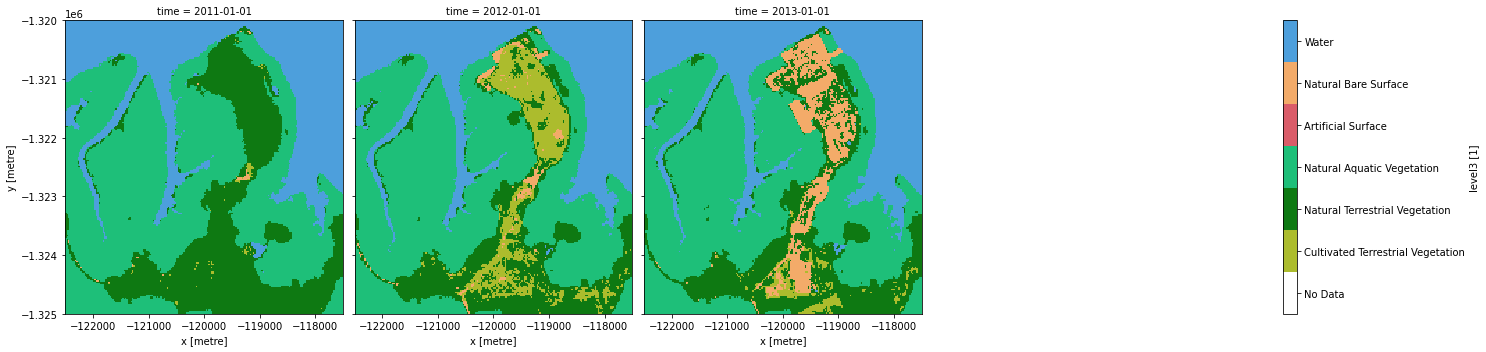

In [138]:
plot_layers(LEVEL3_COLOUR_SCHEME, lc.level3)

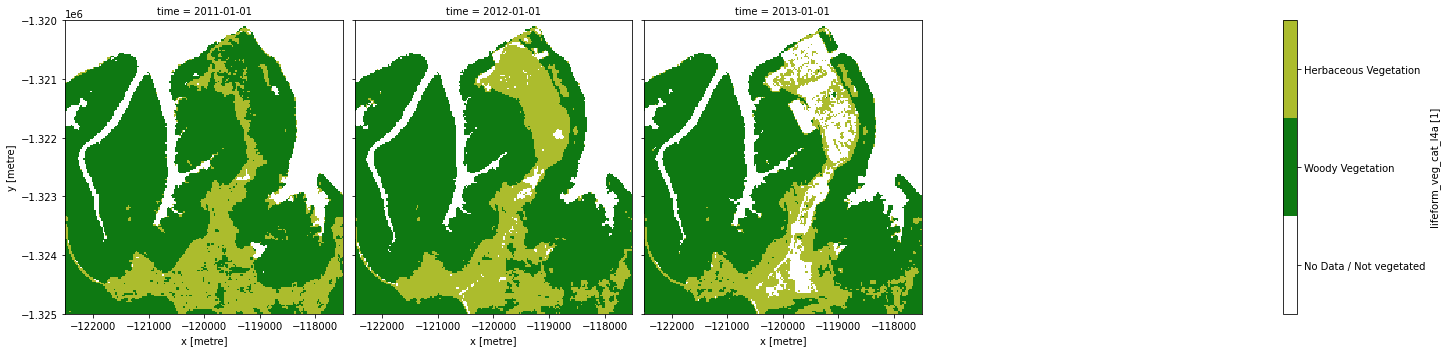

In [113]:
# plot the layer with its provided colour scheme
plot_layer(LIFEFORM_COLOUR_SCHEME, lc.lifeform_veg_cat_l4a)

## Change mapping



In [114]:
ts1 = lc.level3[0]
ts2 = lc.level3[2]

In [120]:
changed = (ts1 != ts2)

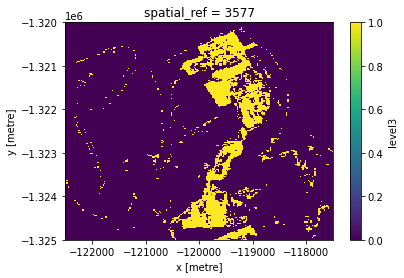

In [132]:
# Where has it changed? This is all the changes.. I just want to look at changes to/from natural vegetation (112)
changed.plot.imshow()

In [133]:
# note where it was nat veg in both time steps
veg1 = np.where(ts1 == 112, 1, 0)
veg2 = np.where(ts2 == 112, 1, 0)

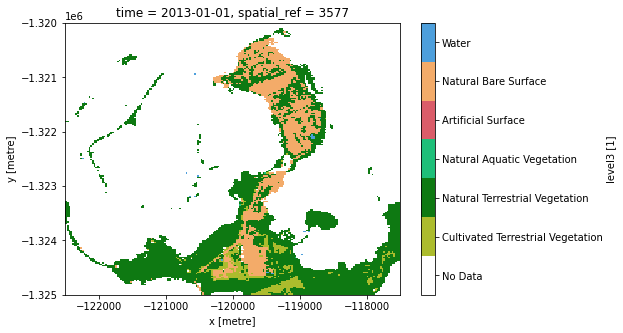

In [139]:
# look at timestep 2 where it was previously natural veg
plot_layer(LEVEL3_COLOUR_SCHEME, ts2.where(veg1))

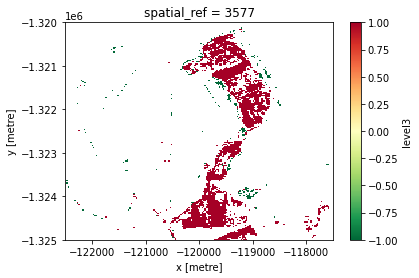

In [142]:
# difference the veg1 and veg2 datasets to see where vegetation has increased / decreased
vegchange = changed.copy(deep = True)
vegchange.data = (veg1 - veg2)

# only show -1 and 1, not the stable veg
vegchange.where(vegchange != 0).plot.imshow(cmap="RdYlGn_r")

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Australia data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/GeoscienceAustralia/dea-notebooks).

**Last modified:** September 2021

**Compatible datacube version:** 

In [28]:
print(datacube.__version__)

1.8.6


## Tags
Browse all available tags on the DEA User Guide's [Tags Index](https://docs.dea.ga.gov.au/genindex.html)